# Seaborn 

#### Distribution Plots

In [3]:
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


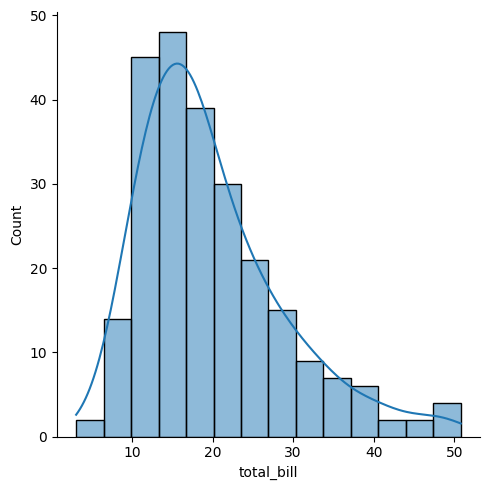

In [6]:
# la distribucion de una variable 
sns.displot(tips['total_bill'], kde=True) #kde = kernel distribution


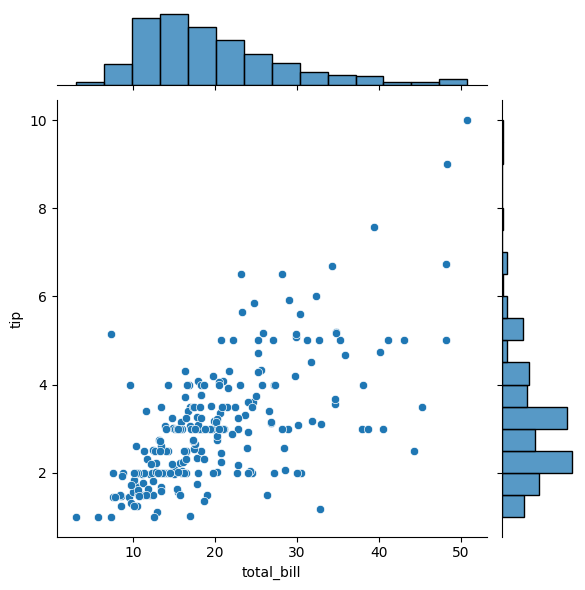

In [7]:
sns.jointplot(x='total_bill',y='tip',data=tips)#, kind='kde') 
# distribuin de dos variables y dentro un scatter plot
# a mayor cuenta mayor propina
# con kind podemos cambiar el grafico de adentro

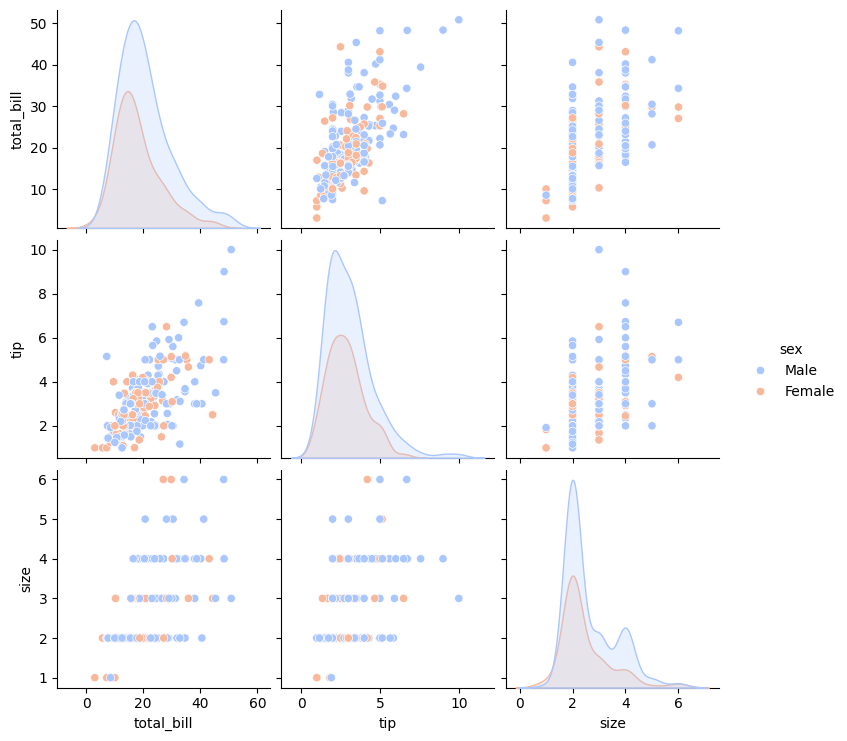

In [8]:
sns.pairplot(tips, hue='sex', palette='coolwarm') 
# hace una relacion de dos a dos con todas las columnas numericas del data set
# con el argumento hue podemos poner un argumento de tipo categoria que nos dara la inf
# de las categorias en relacion a la data que tengamos 

<Axes: xlabel='total_bill'>

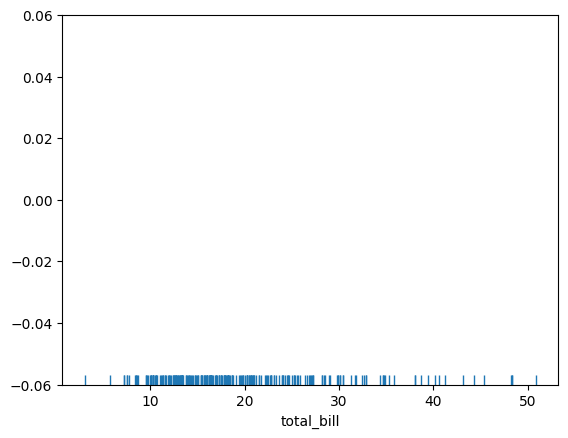

In [9]:
sns.rugplot(tips['total_bill']) # es poner los puntito o dash para ver la distribucion de los 
# datos sintener que hacer un histograma
# este argumento lo tiene tambien distplot()

(0.0, 1.0)

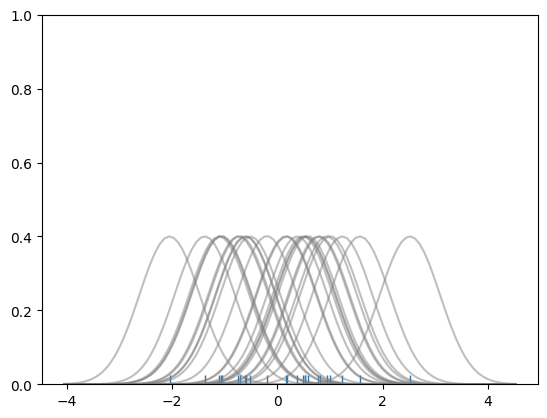

In [10]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

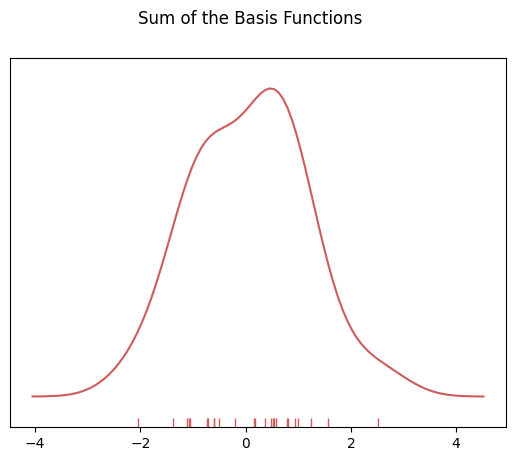

In [11]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<Axes: xlabel='total_bill', ylabel='Density'>

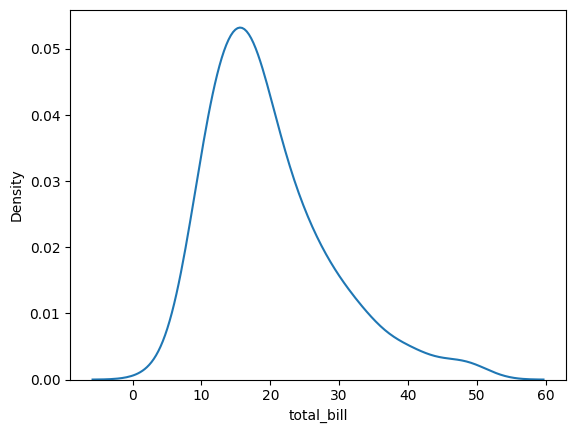

In [12]:
sns.kdeplot(tips['total_bill'])

#### Categorical plots


<Axes: xlabel='sex', ylabel='total_bill'>

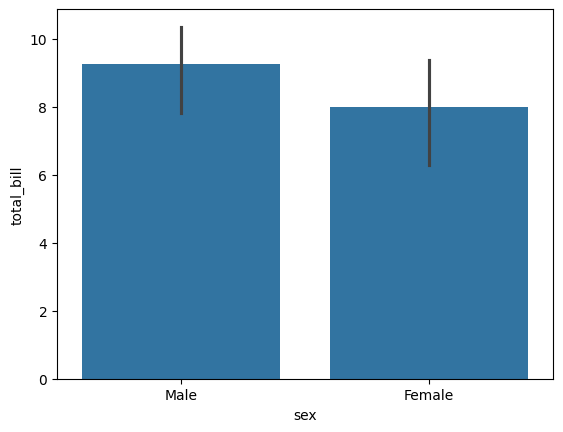

In [13]:
sns.barplot(x='sex',y='total_bill',data=tips, estimator='std') # en el estimador pones por el cual quieres agregar lo datos categoricos 

<Axes: xlabel='sex', ylabel='count'>

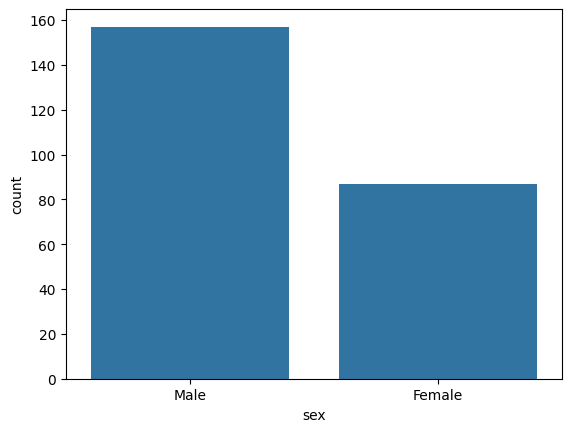

In [14]:
sns.countplot(x='sex', data = tips)

In [15]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

<Axes: xlabel='day', ylabel='total_bill'>

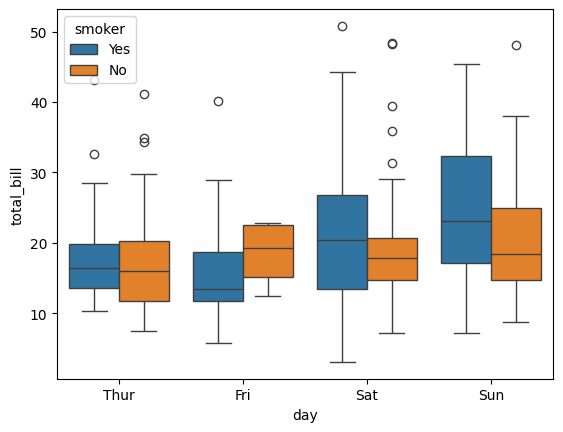

In [16]:
sns.boxplot(x='day',y='total_bill',data=tips, hue='smoker')

<Axes: xlabel='day', ylabel='total_bill'>

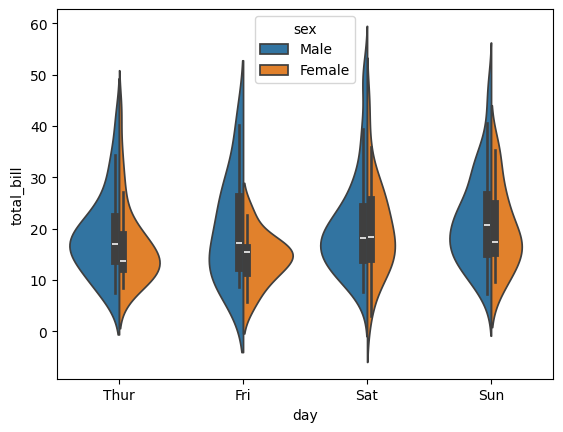

In [17]:
sns.violinplot(x='day',y='total_bill',data=tips, hue='sex', split=True)

<Axes: xlabel='day', ylabel='total_bill'>

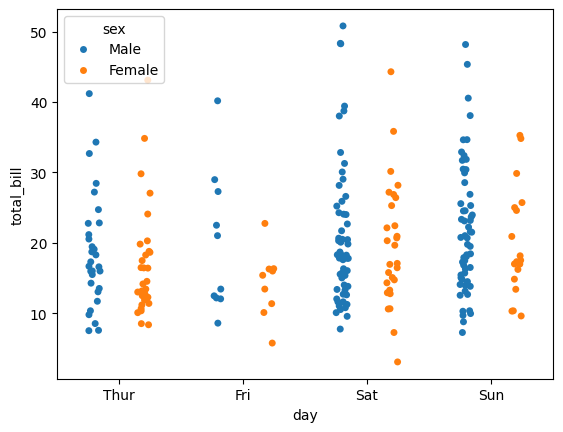

In [18]:
sns.stripplot(x='day',y='total_bill',data=tips, hue='sex',dodge=True) 
# en el curso utilizan split pero lo que funciona en esta version de sns es dodge

<Axes: xlabel='day', ylabel='total_bill'>

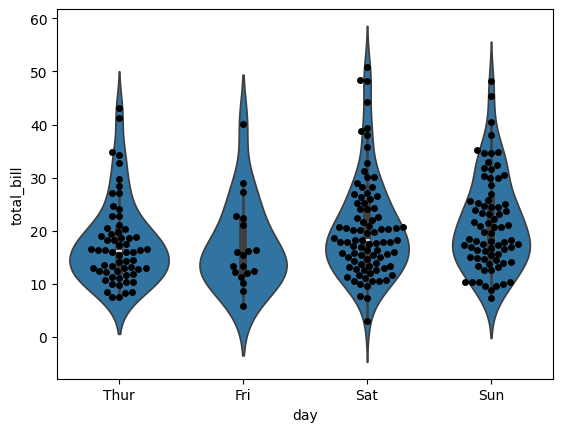

In [19]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips, color='black') # es una cambinacion de el plot tipo viaolin y el plot strip

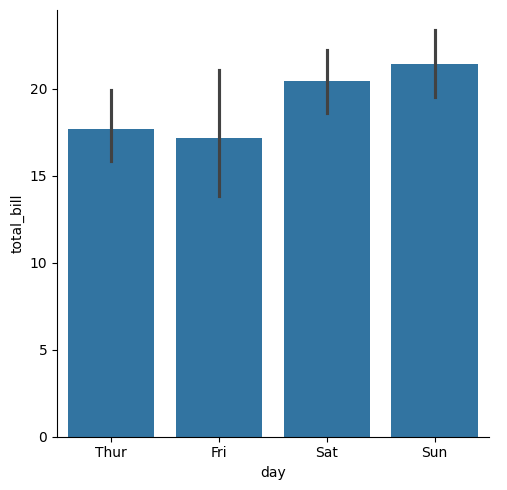

In [ ]:
sns.catplot(x='day',y='total_bill',data=tips, kind='bar')

#### Matrix Plot

In [21]:
flights = sns.load_dataset('flights')
flights.columns

Index(['year', 'month', 'passengers'], dtype='object')

In [22]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [23]:
tc = tips[['total_bill','tip','size']].corr()
tc
# es importante tener la data de esta manera para pasarsela luego a heat map 

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

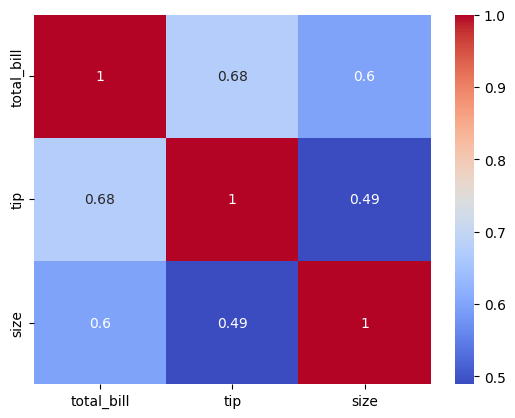

In [24]:
sns.heatmap(tc, annot=True, cmap='coolwarm')

In [25]:
fp = flights.pivot_table(values='passengers',index='month',columns='year',observed=False)

<Axes: xlabel='year', ylabel='month'>

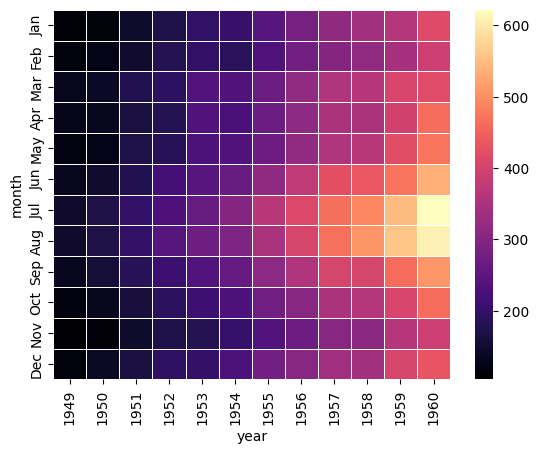

In [26]:
sns.heatmap(fp, cmap='magma', linecolor='white', linewidths=.5)

In [27]:
import scipy

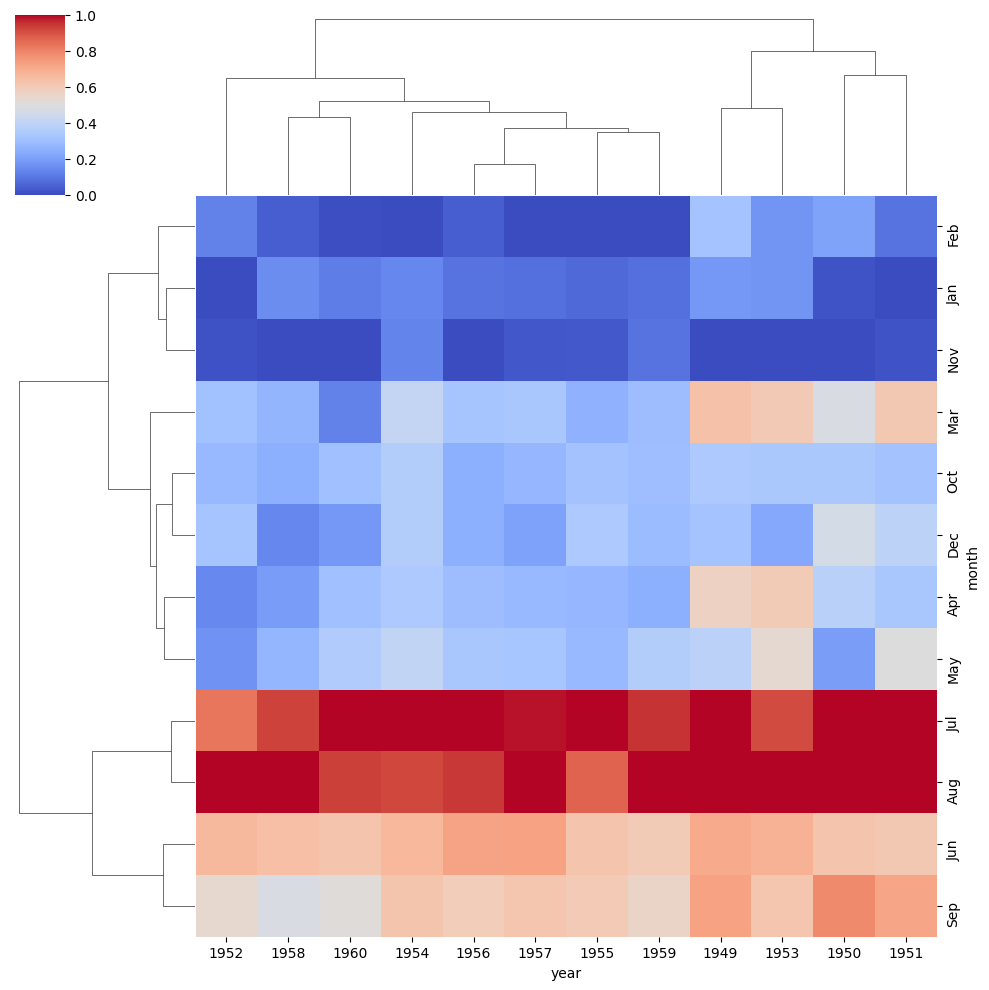

In [28]:
sns.clustermap(fp, cmap='coolwarm', standard_scale=1)

#### Grids

In [29]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

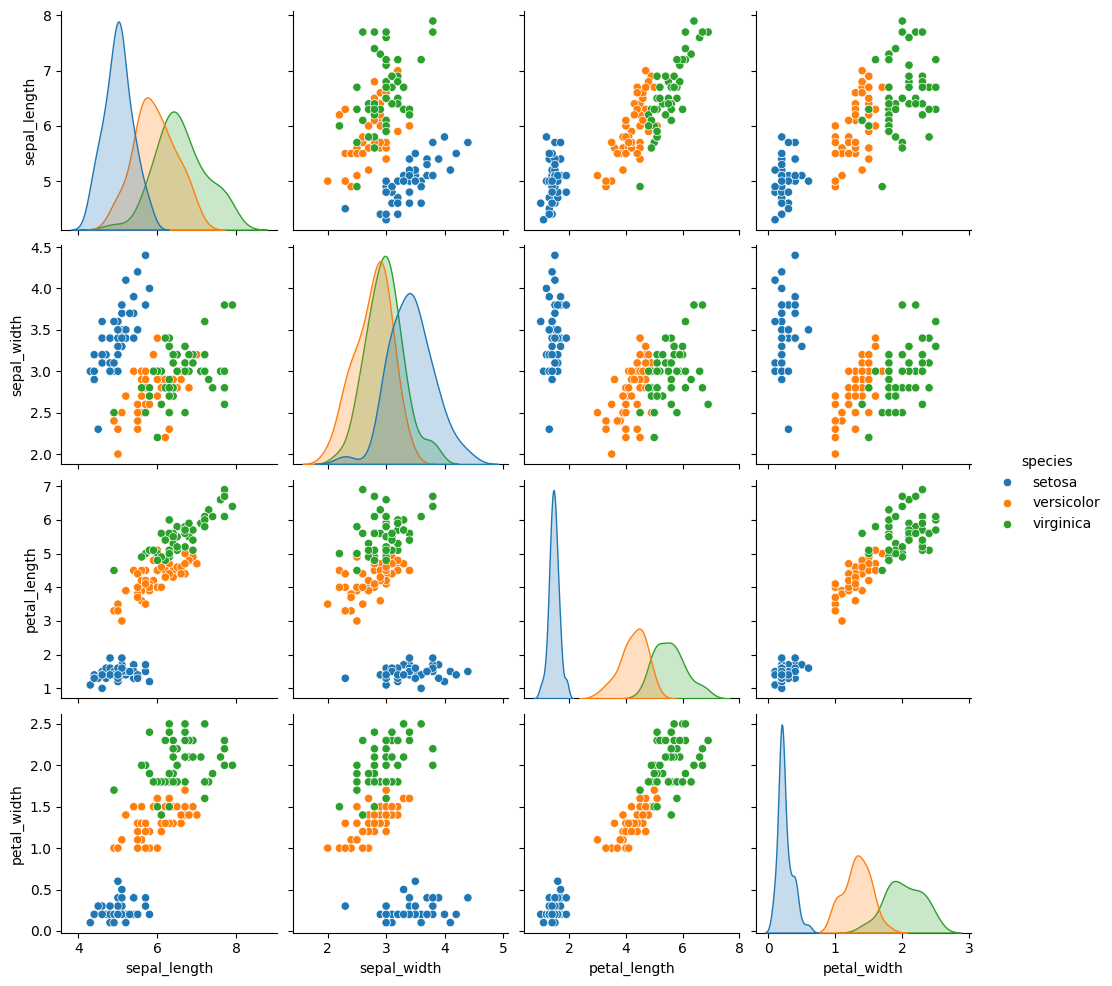

In [31]:
sns.pairplot(iris,hue='species')

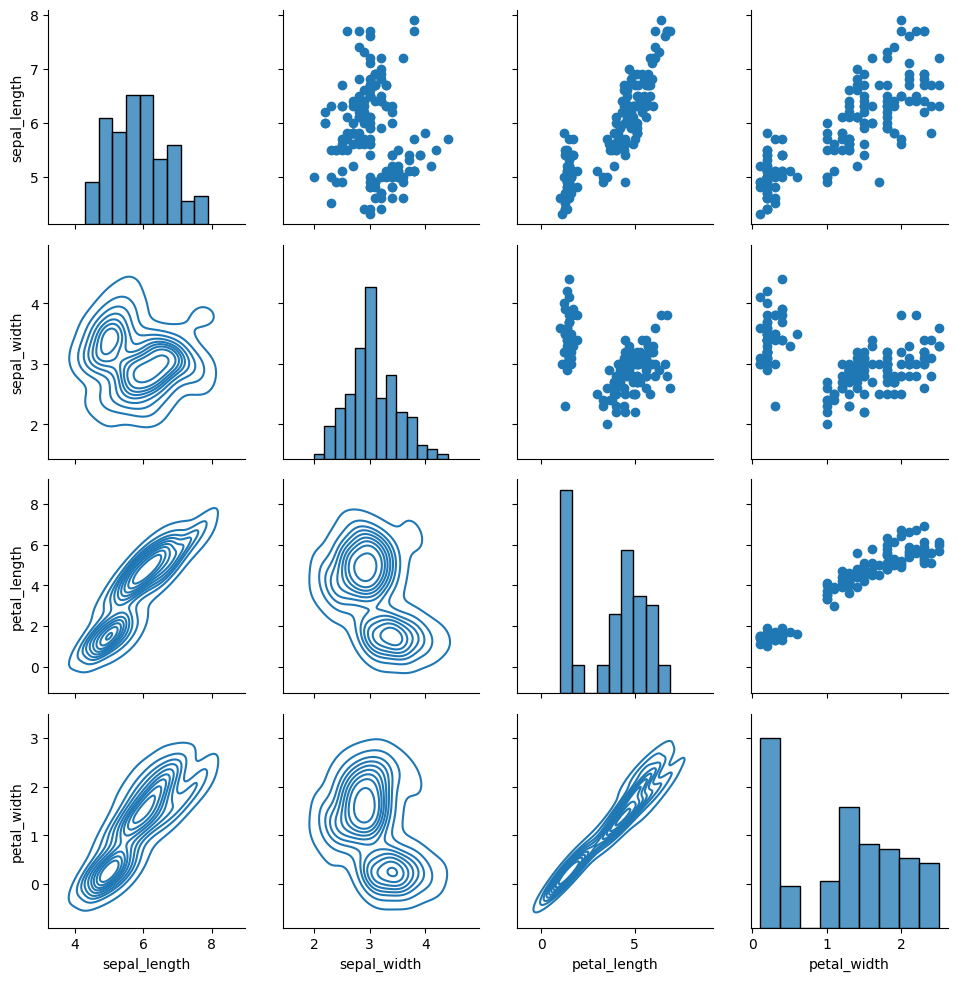

In [32]:
g = sns.PairGrid(iris) # te da el grid de todas las 2 a 2 segun los numericos que tengas, osea te da el linzo 
#g.map(plt.scatter)
g.map_diag(sns.histplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

# de esta manera podemos controlar que tipo de grafico queremos ver en el pair plot de toda la vida 

In [33]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

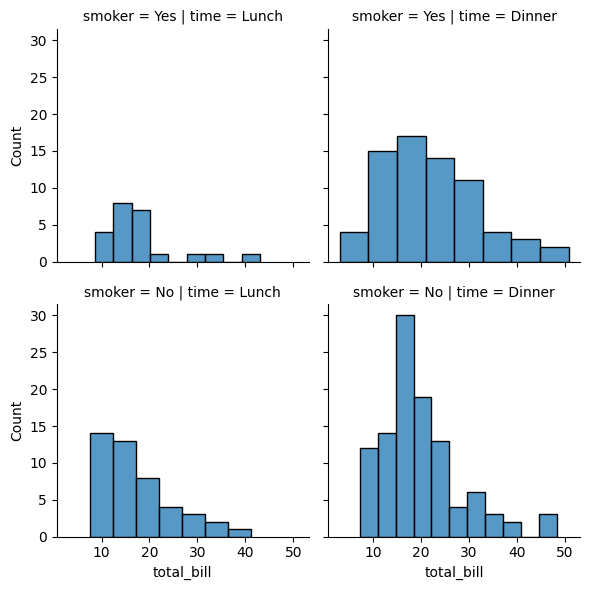

In [34]:
p = sns.FacetGrid(data=tips, col='time',row='smoker')
# con FaceGrid, lo que hacemos es dar el dos a dos de unos argumentos y que contavilice dentro osea que dentro del el 
# value de ese dos a dos en base al grafico que le estamo requiriendo en el map
p.map(sns.histplot,'total_bill')


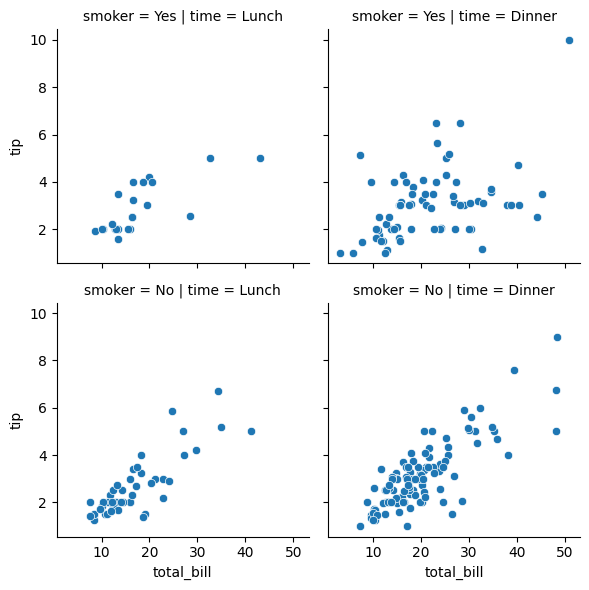

In [35]:
p = sns.FacetGrid(data=tips, col='time',row='smoker')
p.map(sns.scatterplot,'total_bill', 'tip') # en el casod e que el grafico necesite mas de un argumento se lo pasamos y ya
# como en el caso de scatterplot

#### Regressions Plot

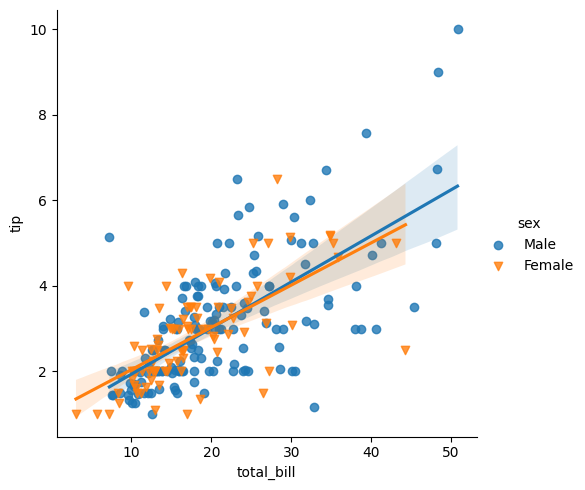

In [36]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o','v'])# en markers puedo pasarle una lista como solo uno
# tambien pudiera afectar cosas mas alla como el tamaño de la imagen y todo eso pero llamando recursos de matplotlib que se
#ejecutan por debajo, lo que tendriamos que ver en la documentacion

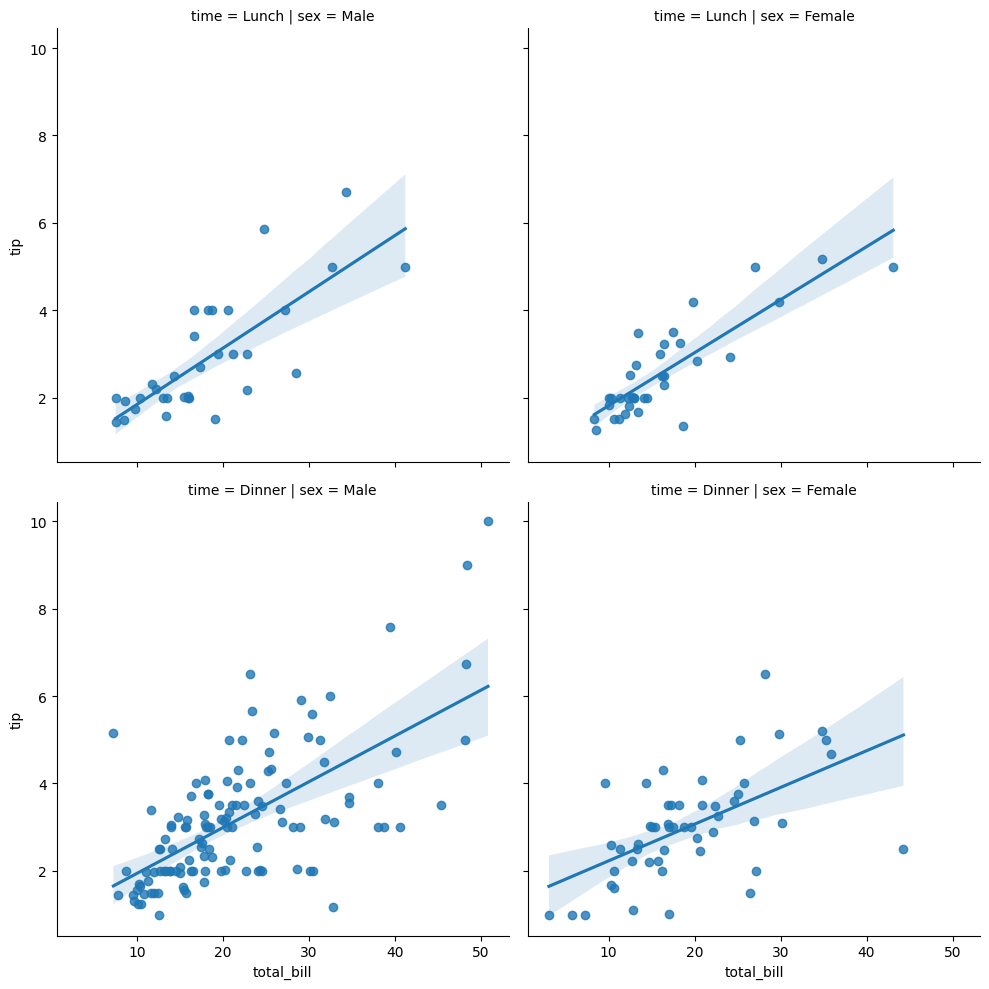

In [37]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex', row='time')
# puedo utilizar el argumento col en vez de hue, para en vez de verles en la misma imagen verlo en separados
# y agregar otra varaible categorica lo que haria es poner de dos a dos como lo veiamos en facegrid osea 
# evitamos hacer ese con este que es mas facil 

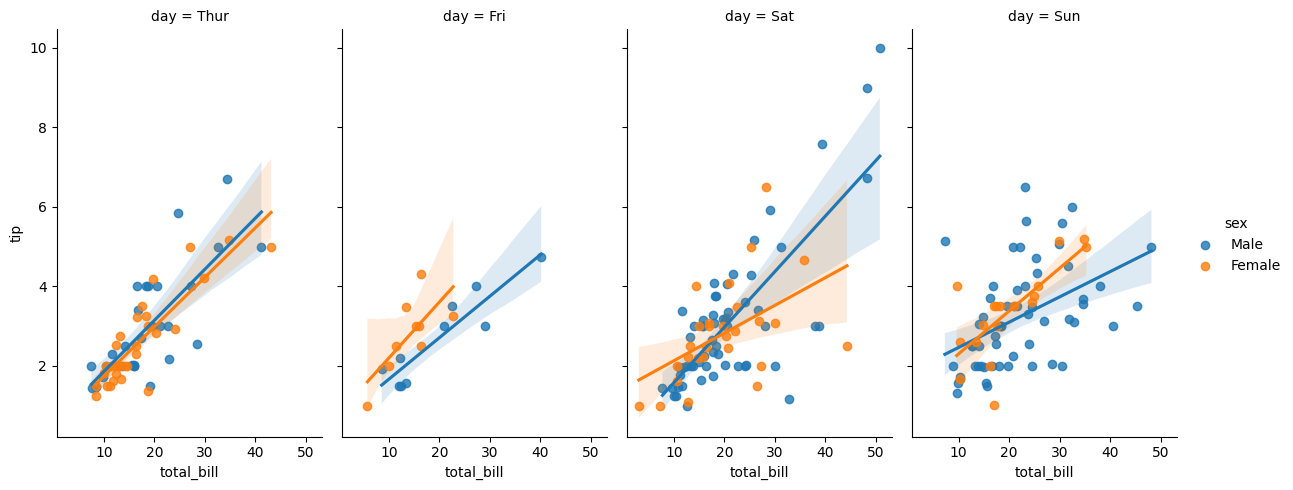

In [38]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex', aspect=0.6) 
# con el argumento aspect lo pones que el grid quede mas bonito


#### Style and color

<Axes: xlabel='sex', ylabel='count'>

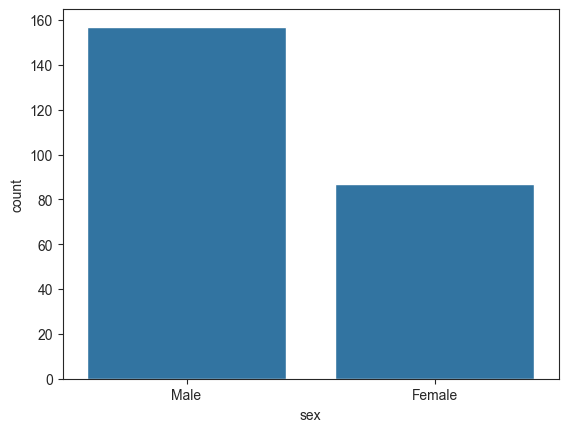

In [63]:
sns.set_style('ticks') # el fondo de la figura
sns.countplot(x='sex', data=tips)
#sns.despine(left=True, bottom=True) # las lineas que estan alli 

<Axes: xlabel='sex', ylabel='count'>

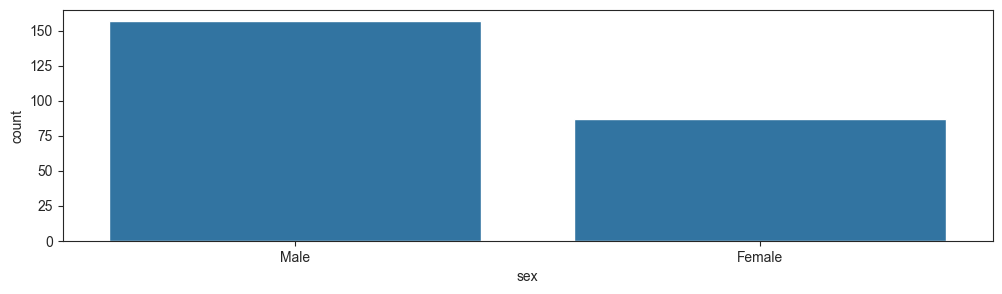

In [ ]:
plt.figure(figsize=(12,3)) 
# si quisiera afectar graficos de seaborn con ordenes de matplotlib
# lo pudiera hacer con el conocimiento de alli
sns.countplot(x='sex', data=tips)

<Axes: xlabel='sex', ylabel='count'>

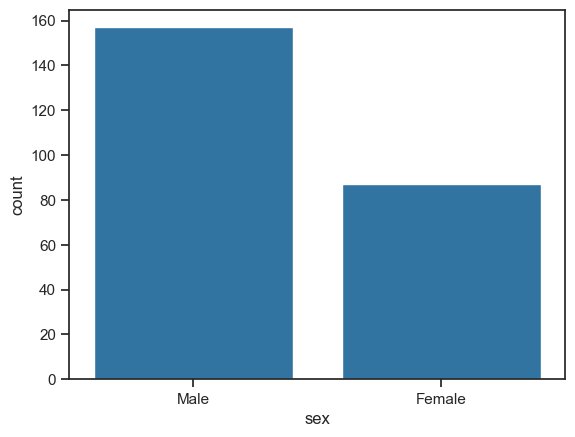

In [73]:
sns.set_context('notebook', font_scale=1)
sns.countplot(x='sex', data=tips)

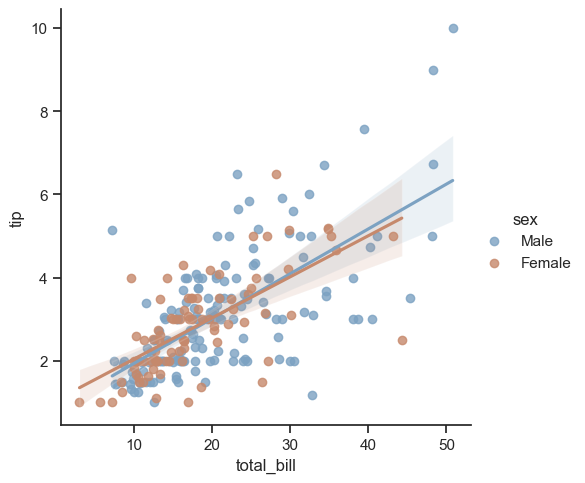

In [78]:
sns.lmplot(x='total_bill',y='tip', data=tips, hue='sex', palette='twilight_shifted')

In [77]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',